## Importação de dados e librarias

In [0]:
!pip install seaborn==0.9.0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('white')

In [0]:
dataset = pd.read_csv('dengue2.csv', sep=';', encoding='utf-8')
dataset.head()

,data,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,01-01-2019,21,25,10,35,16,21,34,18,20,169,44
1,01-02-2019,22,19,17,736,25,17,90,33,39,407,22
2,03-03-2019,58,30,9,2088,83,37,125,34,489,1160,20
3,02-04-2019,255,21,6,601,142,34,100,33,729,1049,12
4,02-05-2019,36,16,8,69,37,22,40,15,250,216,11


In [0]:
dataset['data2']=pd.to_datetime(dataset['data'], dayfirst=True)
dataset['mes'] = dataset['data2'].dt.month
dataset.head()

,data,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,data2,mes
0,01-01-2019,21,25,10,35,16,21,34,18,20,169,44,2019-01-01,1
1,01-02-2019,22,19,17,736,25,17,90,33,39,407,22,2019-02-01,2
2,03-03-2019,58,30,9,2088,83,37,125,34,489,1160,20,2019-03-03,3
3,02-04-2019,255,21,6,601,142,34,100,33,729,1049,12,2019-04-02,4
4,02-05-2019,36,16,8,69,37,22,40,15,250,216,11,2019-05-02,5


In [0]:
# Usar o método .melt para transformar o nome das colunas em categorias
dataset2 = pd.melt(dataset, id_vars=['mes'], value_vars=['2007','2008',	'2009'	,'2010',	'2011',	'2012',	'2013'	,'2014',	'2015'	,'2016', '2017'], 
                   var_name='ano', 
                   value_name='casos_provaveis')
dataset2.head()

,mes,ano,casos_provaveis
0,1,2007,21
1,2,2007,22
2,3,2007,58
3,4,2007,255
4,5,2007,36


In [0]:
dataset3 = dataset2.pivot(index="mes", columns= "ano", values="casos_provaveis")
dataset3.head()

ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
mes,,,,,,,,,,,
1,21,25,10,35,16,21,34,18,20,169,44
2,22,19,17,736,25,17,90,33,39,407,22
3,58,30,9,2088,83,37,125,34,489,1160,20
4,255,21,6,601,142,34,100,33,729,1049,12
5,36,16,8,69,37,22,40,15,250,216,11


### Dados de 2001 a 2017

In [0]:
# tirando os valores onde a UF de infecção é a mesma que o estado notificado, daí coloquei os estados como index, e nomeei as colunas como estado notif
dataset6 = pd.read_csv('dengue uf2.csv', sep=';', encoding='utf-8')
dataset7 = dataset6.set_index('UF_infec').rename_axis("UF_notif", axis="columns")
dataset7.head()

UF_notif,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
UF_infec,,,,,,,,,,,,,,,,,,,,,
RO,0,30,26,2,2,1,0,1,1,4,...,34,6,309,293,55,32,36,108,30,19
AC,22,0,24,0,9,0,1,3,8,11,...,11,21,63,19,5,10,6,4,45,12
AM,17,267,0,37,99,0,0,1,1,5,...,7,10,117,25,11,13,1,4,8,23
RR,1,1,9,0,3,0,0,2,0,2,...,0,1,19,7,4,10,1,2,1,6
PA,3,0,23,2,0,124,192,49,17,12,...,16,13,399,87,46,32,5,111,180,126


In [0]:
# tirando os valores onde a UF de infecção é a mesma que o estado de residência, daí coloquei os estados como index, e nomeei as colunas como estado residencia
dataset8 = pd.read_csv('dengue uf3.csv', sep=';', encoding='utf-8')
dataset9 = dataset8.set_index('UF_infec').rename_axis("UF_resid", axis="columns")
dataset9.head()

UF_resid,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
UF_infec,,,,,,,,,,,,,,,,,,,,,
RO,0,20,25,1,2,1,0,1,0,4,...,27,4,262,238,49,22,26,73,13,15
AC,24,0,29,0,8,0,2,3,7,11,...,11,21,54,17,6,7,5,3,43,11
AM,8,19,0,25,84,0,0,1,1,2,...,7,9,103,23,11,10,1,2,8,22
RR,1,1,9,0,2,0,0,1,0,2,...,0,1,18,5,4,7,1,1,0,6
PA,3,0,19,2,0,84,37,34,6,11,...,13,10,391,77,44,30,7,46,176,113


### exportar para fazer outro gráfico

In [0]:
expo = pd.read_csv('dengue uf2.csv', sep=';', encoding='utf-8')
expo.head()

,UF_infec,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
0,RO,0,30,26,2,2,1,0,1,1,...,34,6,309,293,55,32,36,108,30,19
1,AC,22,0,24,0,9,0,1,3,8,...,11,21,63,19,5,10,6,4,45,12
2,AM,17,267,0,37,99,0,0,1,1,...,7,10,117,25,11,13,1,4,8,23
3,RR,1,1,9,0,3,0,0,2,0,...,0,1,19,7,4,10,1,2,1,6
4,PA,3,0,23,2,0,124,192,49,17,...,16,13,399,87,46,32,5,111,180,126


In [0]:
expo.columns

Index([u'UF_infec', u'RO', u'AC', u'AM', u'RR', u'PA', u'AP', u'TO', u'MA',
       u'PI', u'CE', u'RN', u'PB', u'PE', u'AL', u'SE', u'BA', u'MG', u'ES',
       u'RJ', u'SP', u'PR', u'SC', u'RS', u'MS', u'MT', u'GO', u'DF'],
      dtype='object')

In [0]:
expo2 = pd.melt(expo, id_vars=['UF_infec'], value_vars=[u'RO', u'AC', u'AM', u'RR', u'PA', u'AP', u'TO', u'MA',
       u'PI', u'CE', u'RN', u'PB', u'PE', u'AL', u'SE', u'BA', u'MG', u'ES',
       u'RJ', u'SP', u'PR', u'SC', u'RS', u'MS', u'MT', u'GO', u'DF'], 
                   var_name='ano', 
                   value_name='casos_provaveis')
expo2.head()

,UF_infec,ano,casos_provaveis
0,RO,RO,0
1,AC,RO,22
2,AM,RO,17
3,RR,RO,1
4,PA,RO,3


In [0]:
expo2.to_csv('dengue3.csv')

## Gráficos

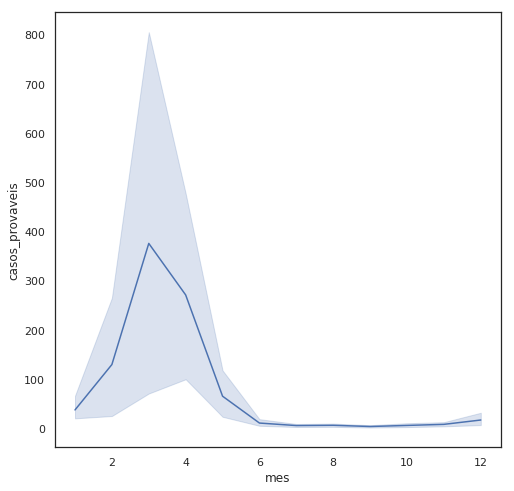

In [0]:
sns.lineplot(x= 'mes',y='casos_provaveis',data=dataset2)

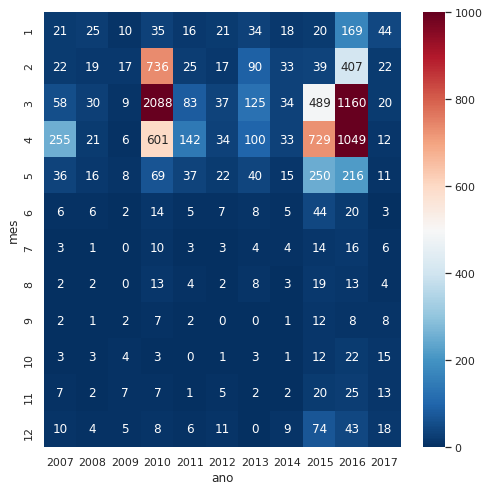

In [0]:
sns.heatmap(dataset3, annot=True, fmt='d', cmap='RdBu_r', vmax=1000, vmin=0)

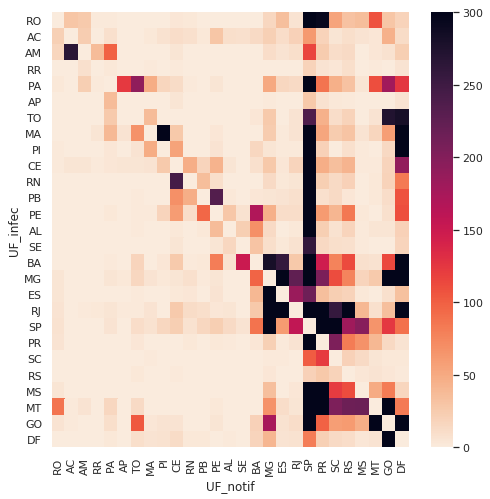

In [0]:
sns.heatmap(dataset7, fmt='d', cmap='rocket_r', vmax=300)

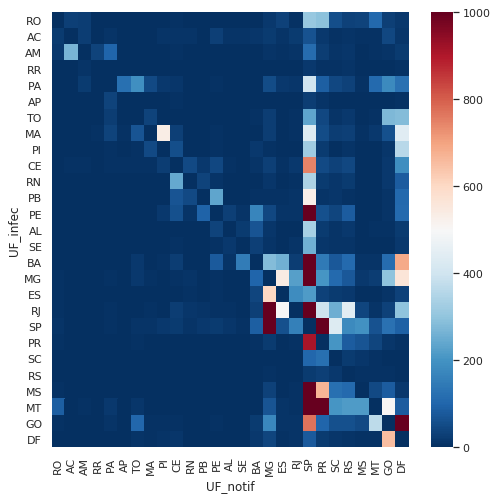

In [0]:
sns.heatmap(dataset7, fmt='d', cmap='RdBu_r', vmax=1000)

#### Por notificação

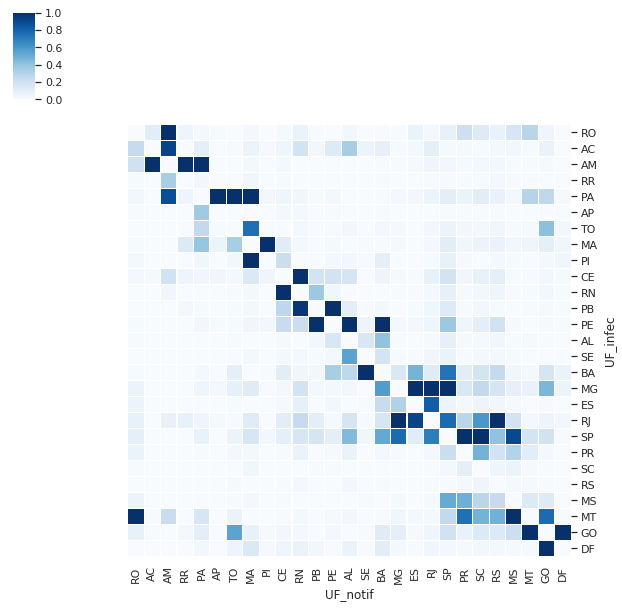

In [0]:
ax = sns.clustermap(dataset7, standard_scale=1, cmap='Blues' , linewidth=0.1,row_cluster=False, col_cluster=False)


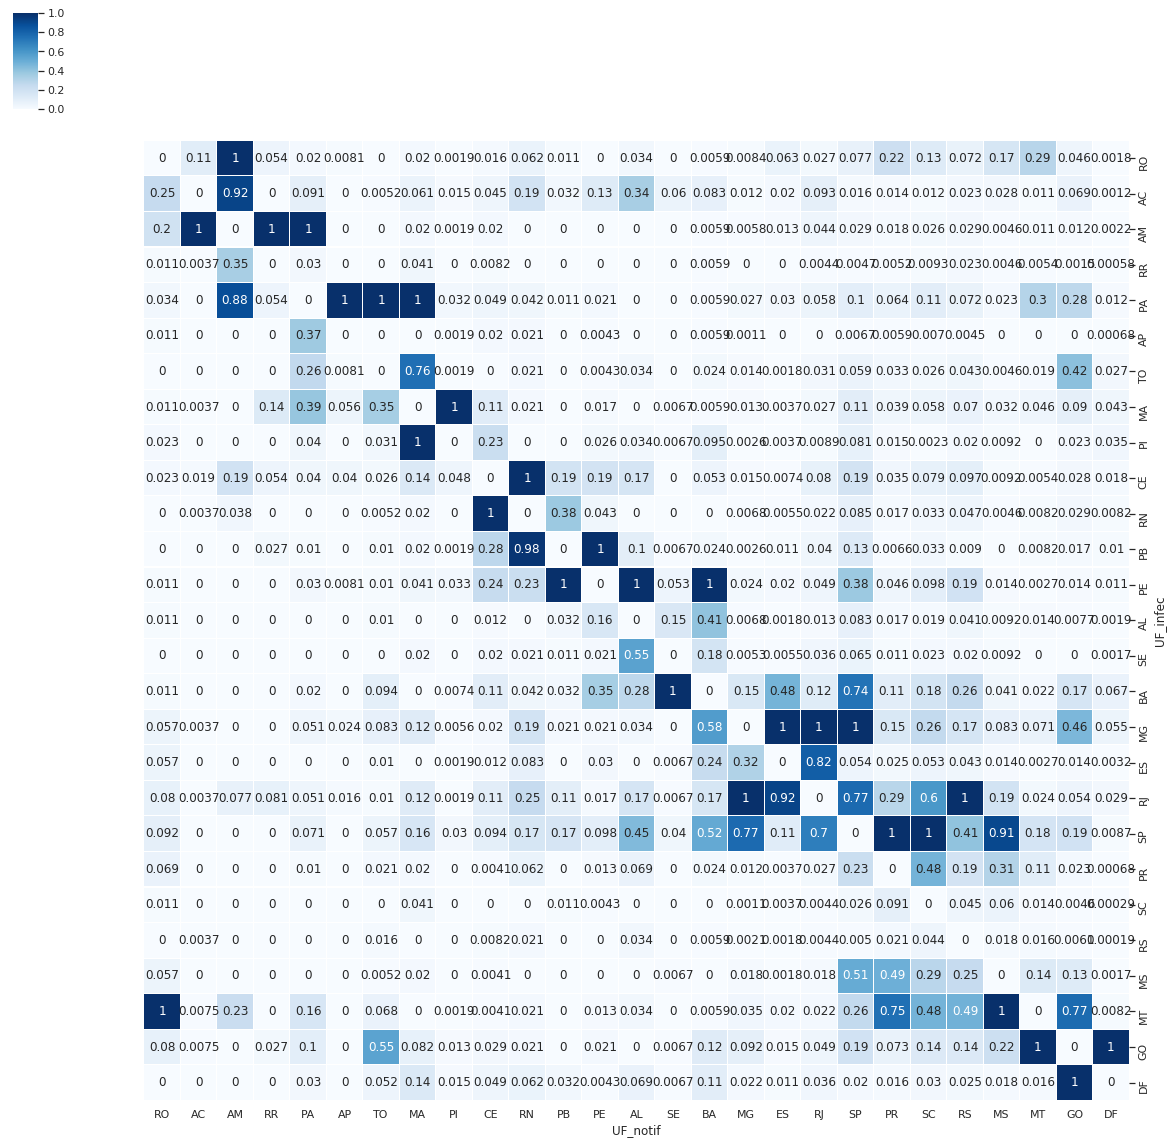

In [0]:
# mesmo gráfico que o anterior, mas com os valores
sns.clustermap(dataset7, standard_scale=1, cmap='Blues' , linewidth=0.1,  annot=True, figsize=(20, 20), row_cluster=False, col_cluster=False)


#### Por residencia

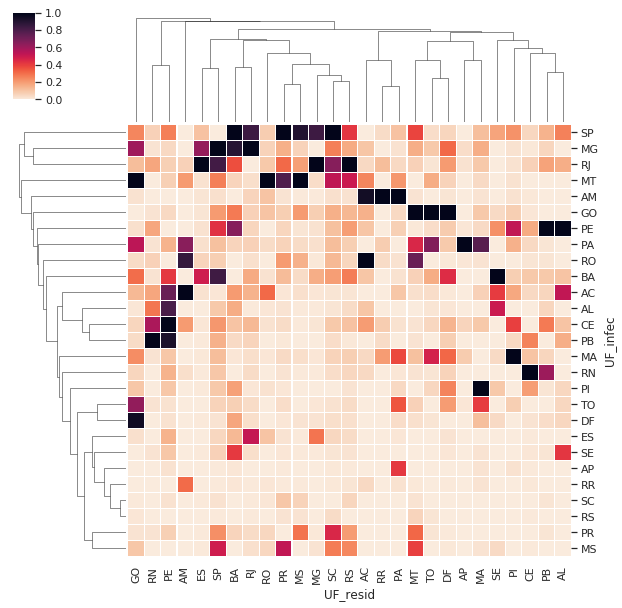

In [0]:
sns.clustermap(dataset9, standard_scale=1, cmap='rocket_r', linewidth=0.1 )

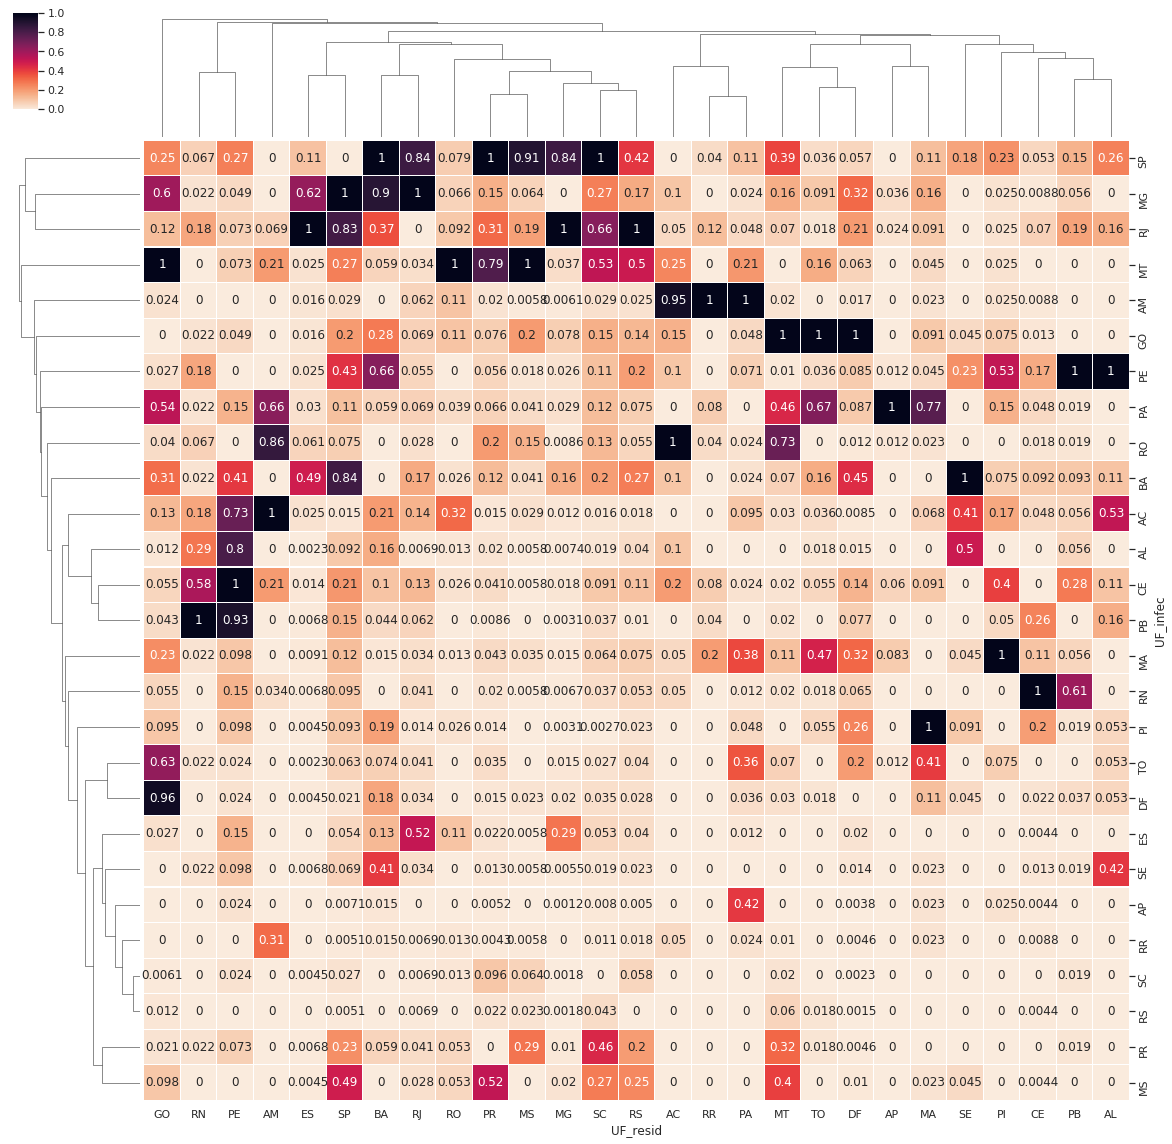

In [0]:
# mesmo gráfico que o anterior, mas com os valores
sns.clustermap(dataset9, standard_scale=1, cmap='rocket_r' , linewidth=0.1,  annot=True, figsize=(20, 20))